<bound method DataFrame.info of                            Timestamp     Your name Your gender      Your age  \
0    2019/07/03 11:48:07 PM GMT+5:30       Parkavi      Female      19 to 25   
1    2019/07/03 11:51:22 PM GMT+5:30      Nithilaa      Female      19 to 25   
2    2019/07/03 11:56:28 PM GMT+5:30     Karunya v      Female      15 to 18   
3     2019/07/04 5:43:35 AM GMT+5:30       Anusha       Female      15 to 18   
4     2019/07/04 5:44:29 AM GMT+5:30      Nikkitha      Female      19 to 25   
..                               ...           ...         ...           ...   
546   2019/07/09 7:46:49 PM GMT+5:30         Kousi      Female  40 and above   
547   2019/07/09 8:20:48 PM GMT+5:30       Dhanuja      Female  40 and above   
548  2019/07/12 11:22:18 AM GMT+5:30    Abhinaya V      Female      19 to 25   
549   2019/07/15 1:48:25 PM GMT+5:30      Vishnu S        Male      19 to 25   
550   2019/07/21 8:54:46 PM GMT+5:30  Mary Presley      Female  40 and above   

     Ho

C:\Windows\Temp\ipykernel_12640\2715130151.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.loc[:, 'Your age'] = pd.to_numeric(data_cleaned['Your age'], errors='coerce')
C:\Windows\Temp\ipykernel_12640\2715130151.py:26: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_cleaned.loc[:, 'Your age'] = pd.to_numeric(data_cleaned['Your age'], errors='coerce')


Index(['Timestamp', 'Your name', 'Your gender', 'Your age',
       'How important is exercise to you ?',
       'How do you describe your current level of fitness ?',
       'How often do you exercise?',
       'What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)',
       'What form(s) of exercise do you currently participate in ?                        (Please select all that apply)',
       'Do you exercise ___________ ?',
       'What time if the day do you prefer to exercise?',
       'How long do you spend exercising per day ?',
       'Would you say you eat a healthy balanced diet ?',
       'What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)',
       'How healthy do you consider yourself?',
       'Have you ever recommended your friends to follow a fitness routine?',
       'Have you ever purchased a fitness equipment?',
       'What motivates you to exercis

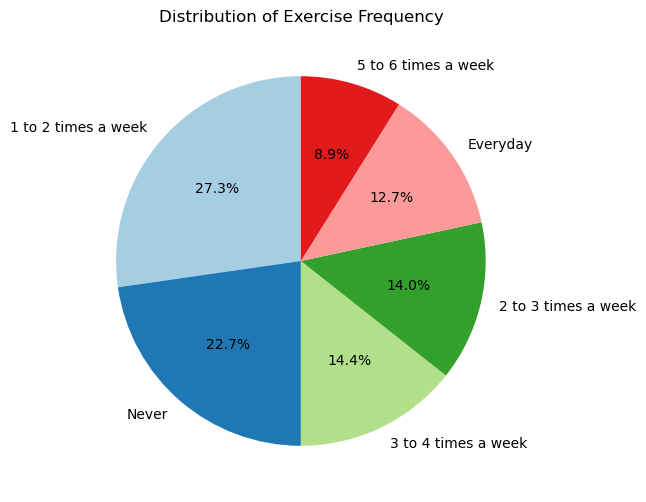

In [5]:
import pandas as pd

# 加载数据集

# data = __________
data = pd.read_csv('健康咨询客户数据集.csv')

# 查看表结构基本信息

# print(__________)
print(data.info)

# 显示每一列的空缺值数量

# print(__________)
print(data.isnull().sum())

# 删除含有缺失值的行

# data_cleaned = __________
data_cleaned = data.dropna()

# 转换 'Your age' 列的数据类型为整数类型，并处理异常值

# data_cleaned.loc[:, 'Your age'] = __________(__________, errors='coerce')
data_cleaned.loc[:, 'Your age'] = pd.to_numeric(data_cleaned['Your age'], errors='coerce')

data_cleaned = data_cleaned.dropna(subset=['Your age'])
data_cleaned = data_cleaned[data_cleaned['Your age'] >= 0]

# data_cleaned.loc[:, 'Your age'] = data_cleaned['Your age'].__________
data_cleaned.loc[:, 'Your age'] = data_cleaned['Your age'].astype(int)

print(data_cleaned['Your age'].dtype)

# 检查和删除重复值
duplicates_removed = data_cleaned.duplicated().sum()

# data_cleaned = __________
data_cleaned = data_cleaned.drop_duplicates()

print(f"Removed {duplicates_removed} duplicate rows")

from sklearn.preprocessing import LabelEncoder

# 归一化 'How do you describe your current level of fitness ?' 列
label_encoder = LabelEncoder()

# data_cleaned[__________] = __________
data_cleaned['How do you describe your current level of fitness ?'] = label_encoder.fit_transform(data_cleaned['How do you describe your current level of fitness ?'])

print(data_cleaned['How do you describe your current level of fitness ?'].unique())

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 去掉列名中的空格
data.columns = data.columns.str.strip()
# 显示数据集的列名
print(data.columns)

# 删除包含缺失值的行
data_cleaned = data.dropna(subset=['How often do you exercise?'])

# 统计不同健身频率的分布情况
exercise_frequency_counts = data_cleaned['How often do you exercise?'].value_counts()

# 绘制饼图
plt.figure(figsize=(10, 6))

# __________(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
exercise_frequency_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title('Distribution of Exercise Frequency')
plt.ylabel('')
plt.show()

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 填充缺失值
data_filled = data.apply(lambda x: x.fillna(x.mode()[0]))

# 划分数据（测试集占比20%）

# train_data, test_data = __________(__________, random_state=42)
train_data, test_data = train_test_split(data_filled, test_size=0.2, random_state=42)

# 保存处理后的数据

# cleaned_file_path = '__________'
# __________(__________, index=False)

cleaned_file_path = '2.1.5_cleaned_data.csv'
data_filled.to_csv(cleaned_file_path, index=False)
